**CodSoft - Project 1**

**MOVIE RATING PREDICTION WITH PYTHON**

Submitted by - Siddharth Arora
GITHUB -

In [144]:
# Importing the dependancies
import numpy as np
import pandas as pd
import seaborn as sb
import plotly.express as px
import matplotlib.pyplot as mpl
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split

In [145]:
movie_file = pd.read_csv('/content/drive/MyDrive/Codsoft/Project-1/IMDb Movies India.csv', encoding='latin1')

REVIEWING THE DATA

In [146]:
movie_file

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [147]:
movie_file.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [148]:
movie_file.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [149]:
movie_file.dtypes

Name         object
Year         object
Duration     object
Genre        object
Rating      float64
Votes        object
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

In [150]:
movie_file.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [151]:
movie_file.shape

(15509, 10)

CLEANING THE DATA

In [152]:
# DROPPING THE NULL VALUES
movie_file.dropna(inplace = True)

In [153]:
movie_file.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [154]:
movie_file.shape

(5659, 10)

CHANGING THE DATATYPES-

In [155]:
# Duration
movie_file['Duration'] = movie_file['Duration'].str.extract('(\d+)')

In [156]:
movie_file['Duration'] = pd.to_numeric(movie_file['Duration'], errors='coerce')

In [157]:
movie_file["Duration"].head()

1    109
3    110
5    147
6    142
8     82
Name: Duration, dtype: int64

In [158]:
# Year
movie_file['Year'] = movie_file['Year'].str.extract('(\d+)')
movie_file['Year'] = pd.to_numeric(movie_file['Year'], errors='coerce')

In [159]:
movie_file["Year"].head()

1    2019
3    2019
5    1997
6    2005
8    2012
Name: Year, dtype: int64

In [160]:
# Genre
genre = movie_file['Genre']

In [161]:
genre.head()

1                        Drama
3              Comedy, Romance
5       Comedy, Drama, Musical
6          Drama, Romance, War
8    Horror, Mystery, Thriller
Name: Genre, dtype: object

In [162]:
genres = movie_file['Genre'].str.split(', ', expand=True)

In [163]:
genre.head()

1                        Drama
3              Comedy, Romance
5       Comedy, Drama, Musical
6          Drama, Romance, War
8    Horror, Mystery, Thriller
Name: Genre, dtype: object

In [164]:
genre_counts = {}
for genre in genres.values.flatten():
    if genre is not None:
        if genre in genre_counts:
            genre_counts[genre] += 1
        else:
            genre_counts[genre] = 1

genereCounts = {genre: count for genre, count in sorted(genre_counts.items())}
for genre, count in genereCounts.items():
    print(f"{genre}: {count}")

Action: 1686
Adventure: 277
Animation: 40
Biography: 115
Comedy: 1344
Crime: 875
Documentary: 48
Drama: 3796
Family: 416
Fantasy: 146
History: 99
Horror: 202
Music: 53
Musical: 412
Mystery: 304
News: 1
Romance: 1380
Sci-Fi: 32
Sport: 40
Thriller: 679
War: 33
Western: 1


In [165]:
genresConsollidated = movie_file['Genre'].value_counts()

In [166]:
genresConsollidated.head()

Drama                   844
Drama, Romance          332
Action, Crime, Drama    329
Action, Drama           206
Comedy, Drama           205
Name: Genre, dtype: int64

In [167]:
genresConsollidated = pd.DataFrame(list(genresConsollidated.items()))
genresConsollidated = genresConsollidated.rename(columns={0: 'Genre', 1: 'Count'})

In [168]:
genresConsollidated.head()

,Genre,Count
0,Drama,844
1,"Drama, Romance",332
2,"Action, Crime, Drama",329
3,"Action, Drama",206
4,"Comedy, Drama",205


In [169]:
# Votes
movie_file['Votes'] = movie_file['Votes'].str.replace(',', '').astype(int)

In [170]:
movie_file['Votes'].head()

1       8
3      35
5     827
6    1086
8     326
Name: Votes, dtype: int64

In [171]:
movie_file["Director"].nunique()

2431

In [172]:
# Directors
directors = movie_file["Director"].value_counts()

In [173]:
directors.head()

David Dhawan            41
Mahesh Bhatt            39
Ram Gopal Varma         33
Hrishikesh Mukherjee    33
Shakti Samanta          33
Name: Director, dtype: int64

In [174]:
# Actors
actors = pd.concat([movie_file['Actor 1'], movie_file['Actor 2'], movie_file['Actor 3']]).dropna().value_counts()

In [175]:
actors.head(10)

Mithun Chakraborty    160
Amitabh Bachchan      148
Dharmendra            146
Ashok Kumar           124
Akshay Kumar          120
Shashi Kapoor         117
Jeetendra             116
Sanjay Dutt           101
Rekha                  92
Ajay Devgn             92
dtype: int64

In [176]:
sb.set(style = "darkgrid", font = "Calibri")

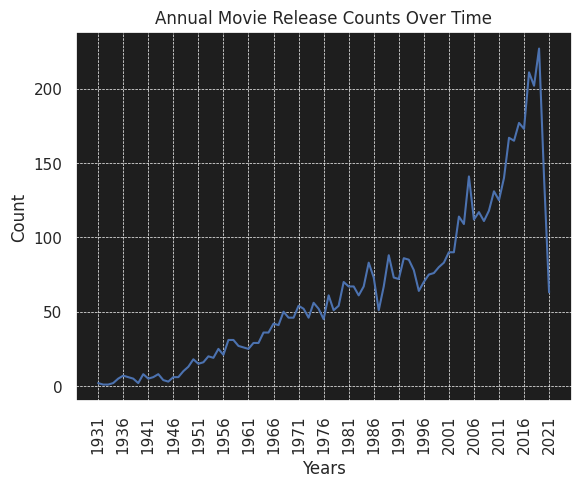

In [177]:
import matplotlib.pyplot as plt

ax = sb.lineplot(data=movie_file['Year'].value_counts().sort_index())

# Customize the plot
darkgrid_positions = range(min(movie_file['Year']), max(movie_file['Year']) + 1, 5)
ax.set_title("Annual Movie Release Counts Over Time")

# Set a dark background color
ax.set_facecolor('#1e1e1e')

# Optionally, you can set the color of the grid lines
ax.grid(True, color='white', linestyle='--', linewidth=0.5)

# Set x-axis labels and rotation
ax.set_xticks(darkgrid_positions)
ax.set_xticklabels(darkgrid_positions, rotation=90)
ax.set_xlabel("Years")
ax.set_ylabel("Count")

# Show the plot
plt.show()


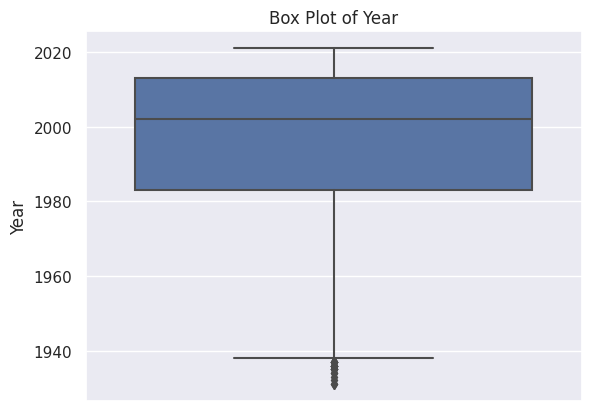

In [178]:
ax = sb.boxplot(data=movie_file, y='Year')
ax.set_ylabel('Year')
ax.set_title('Box Plot of Year')
mpl.show()

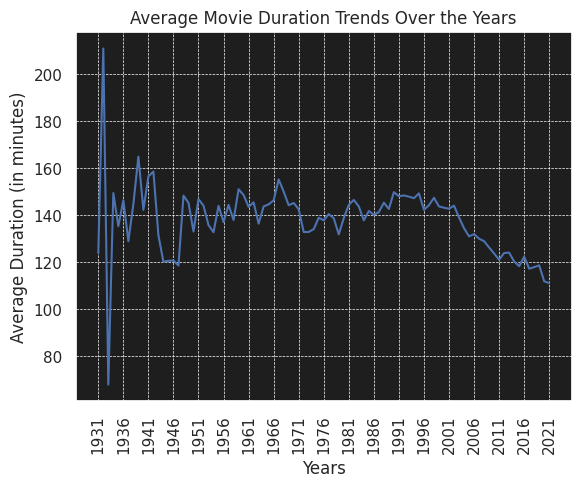

In [179]:

ax = sb.lineplot(data=movie_file.groupby('Year')['Duration'].mean().reset_index(), x='Year', y='Duration')

# Customize the plot
darkgrid_positions = range(min(movie_file['Year']), max(movie_file['Year']) + 1, 5)
ax.set_title("Average Movie Duration Trends Over the Years")

# Set a dark background color
ax.set_facecolor('#1e1e1e')

# Optionally, you can set the color of the grid lines
ax.grid(True, color='white', linestyle='--', linewidth=0.5)

# Set x-axis labels and rotation
ax.set_xticks(darkgrid_positions)
ax.set_xticklabels(darkgrid_positions, rotation=90)
ax.set_xlabel("Years")
ax.set_ylabel('Average Duration (in minutes)')

# Show the plot
plt.show()


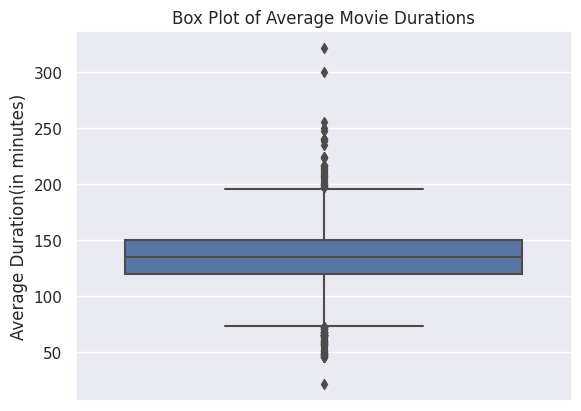

In [180]:
ax = sb.boxplot(data=movie_file, y='Duration')
ax.set_title("Box Plot of Average Movie Durations")
ax.set_ylabel('Average Duration(in minutes)')
mpl.show()

In [181]:
Q1 = movie_file['Duration'].quantile(0.25)
Q3 = movie_file['Duration'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = movie_file[(movie_file['Duration'] >= lower_bound) & (movie_file['Duration'] <= upper_bound)]
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


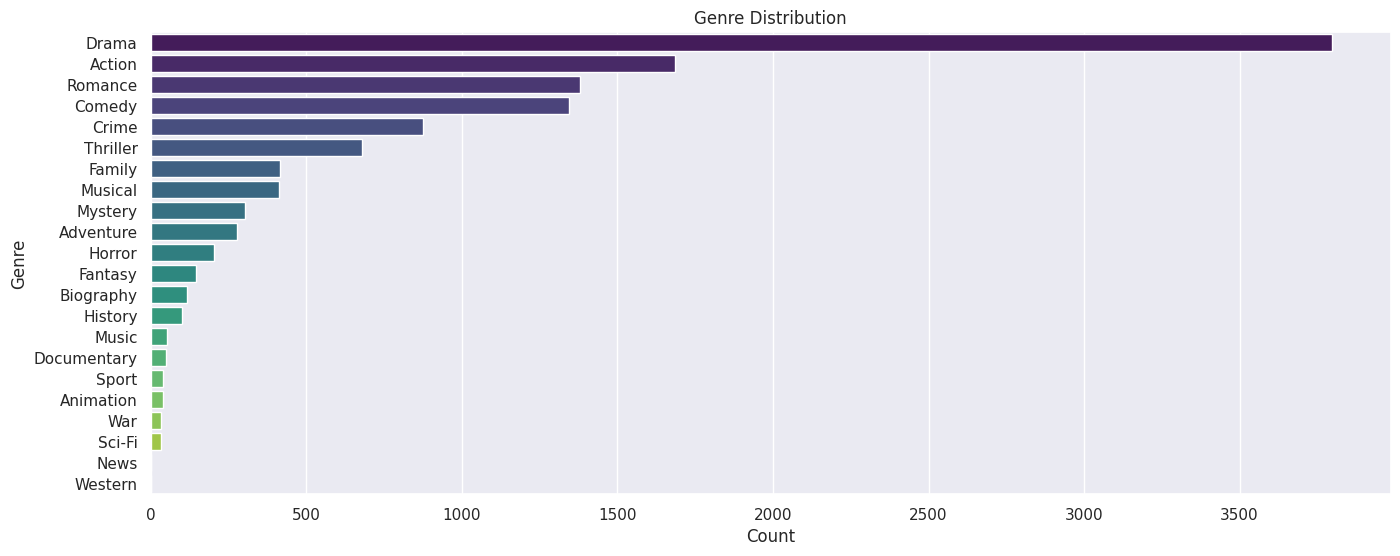

In [182]:

# Splitting genres and creating a DataFrame
genre_counts = movie_file['Genre'].str.split(', ', expand=True).stack().value_counts().reset_index()
genre_counts.columns = ['Genre', 'Count']

# Sorting genres by count in descending order
genre_counts = genre_counts.sort_values(by='Count', ascending=False)

# Plotting the bar plot
plt.figure(figsize=(16, 6))
sb.barplot(x='Count', y='Genre', data=genre_counts, palette='viridis')
plt.title('Genre Distribution')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()


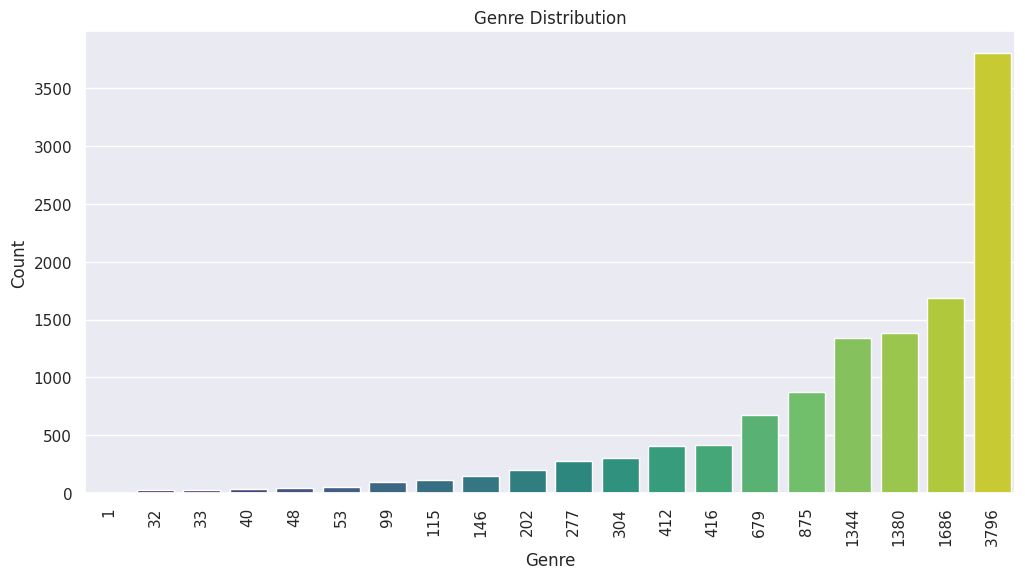

In [183]:
# Sorting genre counts by genre labels
genre_labels = sorted(genreCounts)
genre_counts = sorted(genreCounts)

# Plotting the bar plot
plt.figure(figsize=(12, 6))
ax = sb.barplot(x=genre_labels, y=genre_counts, palette='viridis')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title('Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()


In [184]:
genresConsollidated.loc[genresConsollidated['Count'] < 50, 'Genre'] = 'Other'
ax = px.pie(genresConsollidated, values='Count', names='Genre', title='More than one Genre of movies in Indian Cinema')
ax.show()

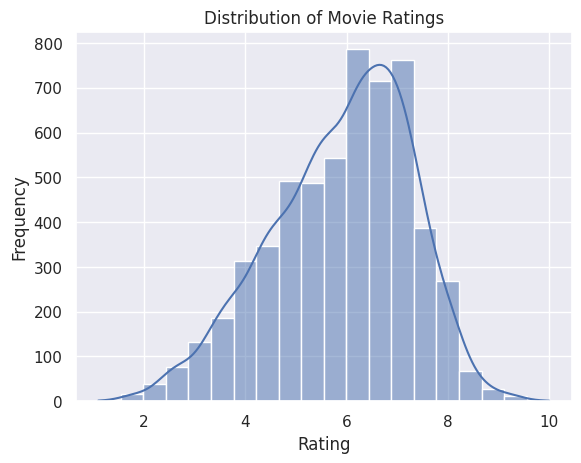

In [185]:
# Distribution of Movie Ratings
ax = sb.histplot(data = movie_file, x = "Rating", bins = 20, kde = True)
ax.set_xlabel('Rating')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Movie Ratings')
mpl.show()

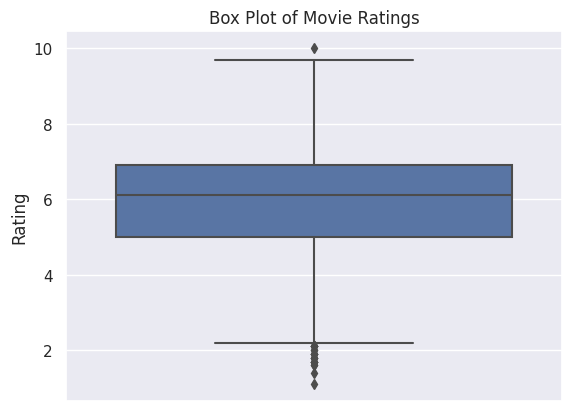

In [186]:
ax = sb.boxplot(data=movie_file, y='Rating')
ax.set_ylabel('Rating')
ax.set_title('Box Plot of Movie Ratings')
mpl.show()


In [187]:
Q1 = movie_file['Rating'].quantile(0.25)
Q3 = movie_file['Rating'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
movie_file = movie_file[(movie_file['Rating'] >= lower_bound) & (movie_file['Rating'] <= upper_bound)]
movie_file.head(16)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,2014,116,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon
10,1:1.6 An Ode to Lost Love,2004,96,Drama,6.2,17,Madhu Ambat,Rati Agnihotri,Gulshan Grover,Atul Kulkarni
11,1:13:7 Ek Tera Saath,2016,120,Horror,5.9,59,Arshad Siddiqui,Pankaj Berry,Anubhav Dhir,Hritu Dudani
12,100 Days,1991,161,"Horror, Romance, Thriller",6.5,983,Partho Ghosh,Jackie Shroff,Madhuri Dixit,Javed Jaffrey
13,100% Love,2012,166,"Comedy, Drama, Romance",5.7,512,Rabi Kinagi,Jeet,Koyel Mallick,Sujoy Ghosh


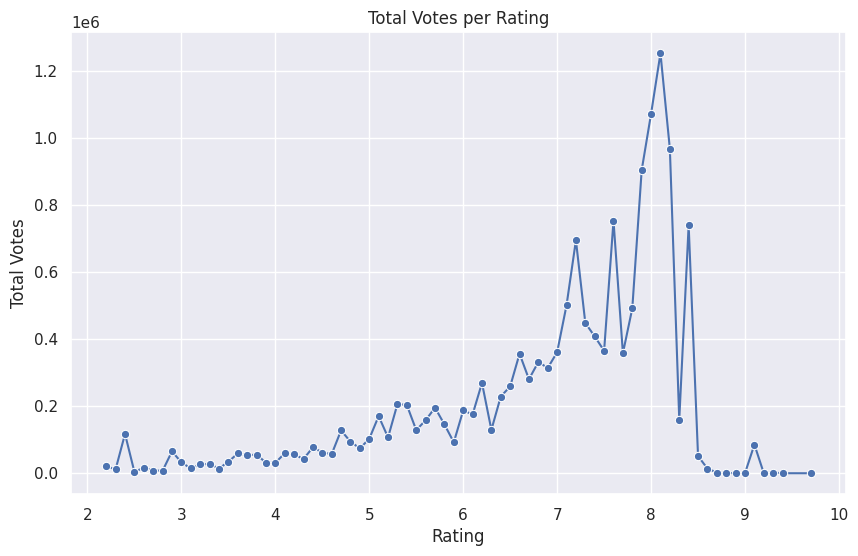

In [188]:
rating_votes = movie_file.groupby('Rating')['Votes'].sum().reset_index()
mpl.figure(figsize=(10, 6))
ax_line_seaborn = sb.lineplot(data=rating_votes, x='Rating', y='Votes', marker='o')
ax_line_seaborn.set_xlabel('Rating')
ax_line_seaborn.set_ylabel('Total Votes')
ax_line_seaborn.set_title('Total Votes per Rating')
mpl.show()

PREPARING A MODEL

In [189]:
Input = movie_file.drop(['Name', 'Genre', 'Rating', 'Director', 'Actor 1', 'Actor 2', 'Actor 3'], axis=1)
Output = movie_file['Rating']

In [190]:
x_train, x_test, y_train, y_test = train_test_split(Input, Output, test_size = 0.2, random_state = 1)

In [191]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score as score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [192]:
def evaluate_model(y_true, y_pred, model_name):
    print("Model: ", model_name)
    print("Accuracy = {:0.2f}%".format(score(y_true, y_pred)*1000))
    print("Mean Squared Error = {:0.2f}\n".format(mean_squared_error(y_true, y_pred, squared=False)))
    return round(score(y_true, y_pred)*1000, 2)

In [193]:
LR = LinearRegression()
LR.fit(x_train, y_train)
lr_preds = LR.predict(x_test)

RFR = RandomForestRegressor(n_estimators=100, random_state=1)
RFR.fit(x_train, y_train)
rf_preds = RFR.predict(x_test)

DTR = DecisionTreeRegressor(random_state=1)
DTR.fit(x_train, y_train)
dt_preds = DTR.predict(x_test)

XGBR = XGBRegressor(n_estimators=100, random_state=1)
XGBR.fit(x_train, y_train)
xgb_preds = XGBR.predict(x_test)

GBR = GradientBoostingRegressor(n_estimators=100, random_state=60)
GBR.fit(x_train, y_train)
gb_preds = GBR.predict(x_test)

LGBMR = LGBMRegressor(n_estimators=100, random_state=60)
LGBMR.fit(x_train, y_train)
lgbm_preds = LGBMR.predict(x_test)

CBR = CatBoostRegressor(n_estimators=100, random_state=1, verbose=False)
CBR.fit(x_train, y_train)
catboost_preds = CBR.predict(x_test)

KNR = KNeighborsRegressor(n_neighbors=5)
KNR.fit(x_train, y_train)
knn_preds = KNR.predict(x_test)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000074 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 484
[LightGBM] [Info] Number of data points in the train set: 4505, number of used features: 3
[LightGBM] [Info] Start training from score 5.919156


In [194]:
LRScore = evaluate_model(y_test, lr_preds, "LINEAR REGRESSION")
RFScore = evaluate_model(y_test, rf_preds, "RANDOM FOREST")
DTScore = evaluate_model(y_test, dt_preds, "DECEISION TREE")
XGBScore = evaluate_model(y_test, xgb_preds, "EXTENDED GRADIENT BOOSTING")
GBScore = evaluate_model(y_test, gb_preds, "GRADIENT BOOSTING")
LGBScore = evaluate_model(y_test, lgbm_preds, "LIGHT GRADIENT BOOSTING")
CBRScore = evaluate_model(y_test, catboost_preds, "CAT BOOST")
KNNScore = evaluate_model(y_test, knn_preds, "K NEAREST NEIGHBORS")

Model:  LINEAR REGRESSION
Accuracy = -66.30%
Mean Squared Error = 1.39

Model:  RANDOM FOREST
Accuracy = 189.85%
Mean Squared Error = 1.22

Model:  DECEISION TREE
Accuracy = -499.29%
Mean Squared Error = 1.65

Model:  EXTENDED GRADIENT BOOSTING
Accuracy = 164.50%
Mean Squared Error = 1.23

Model:  GRADIENT BOOSTING
Accuracy = 299.99%
Mean Squared Error = 1.13

Model:  LIGHT GRADIENT BOOSTING
Accuracy = 268.29%
Mean Squared Error = 1.16

Model:  CAT BOOST
Accuracy = 263.96%
Mean Squared Error = 1.16

Model:  K NEAREST NEIGHBORS
Accuracy = 92.12%
Mean Squared Error = 1.29



In [195]:
# Storing rsult in dataframe
models = pd.DataFrame(
    {
        "MODELS": ["Linear Regression", "Random Forest", "Decision Tree", "Gradient Boosting", "Extended Gradient Boosting", "Light Gradient Boosting", "Cat Boosting", "K Nearest Neighbors"],
        "SCORES": [LRScore, RFScore, DTScore, GBScore, XGBScore, LGBScore, CBRScore, KNNScore]
    }
)
models.sort_values(by='SCORES', ascending = False)


,MODELS,SCORES
3,Gradient Boosting,299.99
5,Light Gradient Boosting,268.29
6,Cat Boosting,263.96
1,Random Forest,189.85
4,Extended Gradient Boosting,164.50
7,K Nearest Neighbors,92.12
0,Linear Regression,-66.30
2,Decision Tree,-499.29
